# Actividad 2. Métodos basados en distancias

### Javier Esmerado Vela

### Ejercicio 1

In [3]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


path = './dataset-66223.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


### Pasos a seguir
* **Cargar y explorar los datos:** Verificaré la estructura del dataset, los tipos de datos y cualquier característica relevante.

* **Preprocesamiento de los datos:** Esto puede incluir la limpieza de datos, el manejo de valores faltantes, y el escalado de los datos si es necesario, dado que KNN es sensible a la escala de los datos.

* **Construcción del modelo KNN:** Crearé un modelo KNN y lo entrenaré con los datos. Durante este paso, variaré el número de vecinos (K) para encontrar el valor óptimo.

* **Evaluación del modelo:** Primero, utilizaré la precisión como métrica de evaluación y luego la sensibilidad (recall) para determinar la eficiencia del clasificador en ambos escenarios.

* **Optimización de K:** Buscaré el valor óptimo de K que evite el sobreajuste y al mismo tiempo ofrezca buenos resultados según las métricas de interés.

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Verificar si hay valores faltantes
missing_values = df.isnull().sum()

In [6]:
# Convertir la variable objetivo 'Purchase' a numérica
purchase_ = 'Purchase'
label_encoder = LabelEncoder()
df[purchase_] = label_encoder.fit_transform(df[purchase_])

In [7]:
# Escalar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(purchase_, axis=1))

In [8]:
# Verificar valores faltantes y la conversión de 'Purchase'
missing_values_summary = len(missing_values[missing_values > 0])
purchase_conversion = df[purchase_].head()

missing_values_summary, purchase_conversion

(0,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Purchase, dtype: int64)

Podemos observar que no hay valores faltantes y que la variable objetivo se ha convertido a numérica, convitiendo los valores 'Yes' a 1 y 'No' a 0.

### Construcción del modelo KNN

Dividiremos los datos en conjuntos de entrenamiento y prueba, luego, entrenaremos el modelo con diferentes valores de K para encontrar el valor óptimo.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score
import numpy as np

In [10]:
# Dividir los datos en entrenamiento y prueba
X = scaled_features
y = df[purchase_]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Función para entrenar y evaluar el modelo KNN con diferentes valores de K
def evaluate_knn(max_k, metric):
    k_values = range(1, max_k + 1)
    scores = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        if metric == 'accuracy':
            score = accuracy_score(y_test, y_pred)
        elif metric == 'recall':
            score = recall_score(y_test, y_pred)
        scores.append(score)
    
    return k_values, scores

In [12]:
# Evaluación utilizando precisión (accuracy)
k_values_accuracy, accuracy_scores = evaluate_knn(20, 'accuracy')

In [13]:
# Resultados 
k_values_accuracy, accuracy_scores

(range(1, 21),
 [0.8883800801373783,
  0.927876359473383,
  0.9204350314825415,
  0.9307384087006296,
  0.9284487693188322,
  0.9318832283915284,
  0.9307384087006296,
  0.9318832283915284,
  0.9318832283915284,
  0.9318832283915284,
  0.9318832283915284,
  0.9318832283915284,
  0.9318832283915284,
  0.9318832283915284,
  0.9318832283915284,
  0.9318832283915284,
  0.9318832283915284,
  0.9318832283915284,
  0.9318832283915284,
  0.9318832283915284])

La precisión del clasificador KNN con diferentes valores de K (desde 1 hasta 20), muestra que la precisión mejora a medida que K aumenta, estabilizándose al rededor de un valor de K=7, a partir de ahí se mantiene constante. Se muestra en la siguiente gráfica:

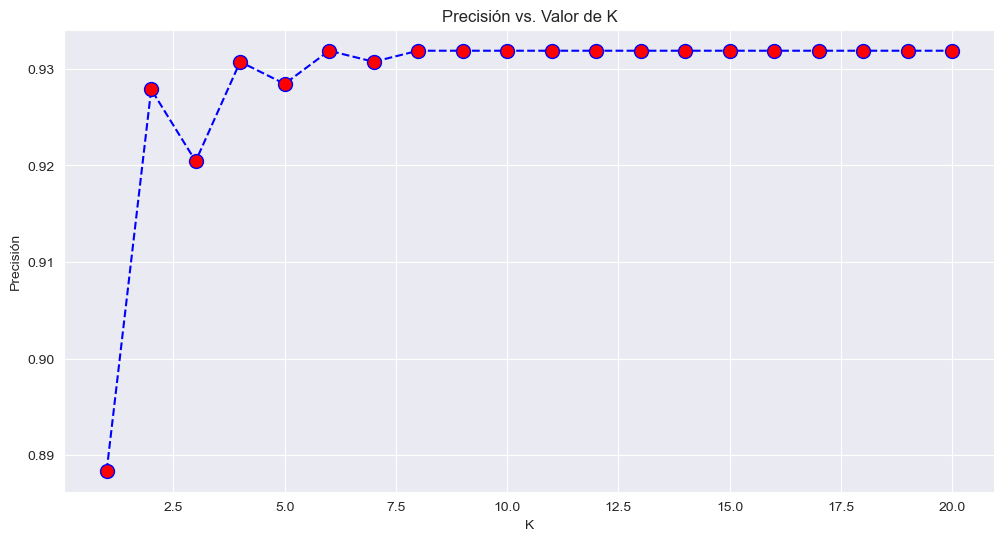

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(k_values_accuracy, accuracy_scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Precisión vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Precisión')
plt.show()

In [15]:
# Evaluación utilizando sensibilidad (recall)
k_values_recall, recall_scores = evaluate_knn(20, 'recall')

# Resultados de sensibilidad
k_values_recall, recall_scores

(range(1, 21),
 [0.12605042016806722,
  0.01680672268907563,
  0.03361344537815126,
  0.01680672268907563,
  0.01680672268907563,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0])

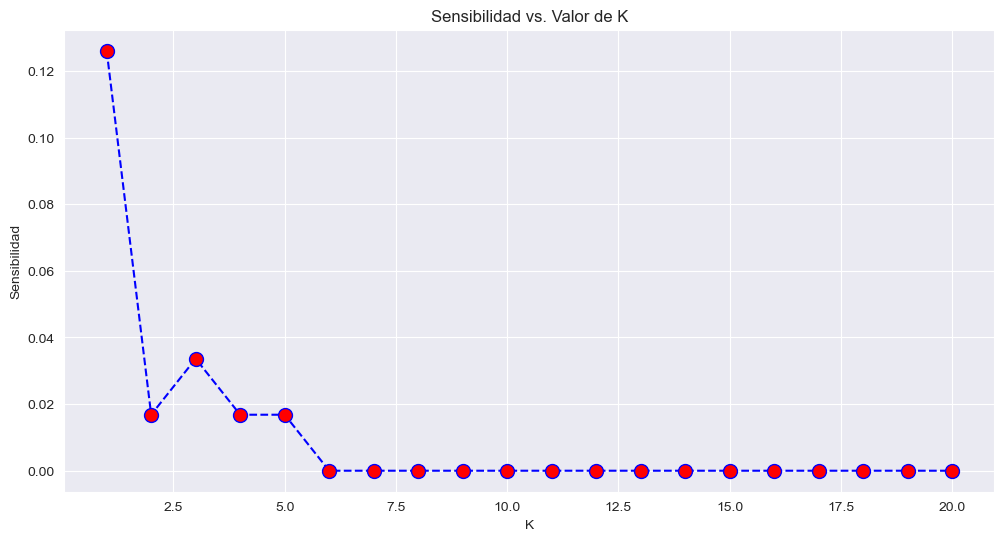

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(k_values_recall, recall_scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Sensibilidad vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Sensibilidad')
plt.show()

Este resultado indica que aunque el modelo tiene una alta precisión, su capacidad para identificar correctamente a los verdaderos compradores es muy limitada.

### Reequilibrar los datos utilizando la sensibilidad (recall).

In [17]:
# Recargar el dataset y aplicar el preprocesamiento nuevamente
data = pd.read_csv(path)
data[purchase_] = LabelEncoder().fit_transform(data[purchase_])
X = StandardScaler().fit_transform(data.drop('Purchase', axis=1))
y = data[purchase_]

In [18]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para reequilibrar el conjunto de datos
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [20]:
# Función para entrenar y evaluar el modelo KNN con diferentes valores de K con entrenamiento y prueba.
def evaluate_knn(max_k, metric, X_train, y_train):
    k_values = range(1, max_k + 1)
    scores = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        if metric == 'accuracy':
            score = accuracy_score(y_test, y_pred)
        elif metric == 'recall':
            score = recall_score(y_test, y_pred)
        scores.append(score)
    
    return k_values, scores

In [21]:
# Volver a evaluar el modelo KNN utilizando sensibilidad (recall) como métrica
# pero esta vez con los datos reequilibrados
k_values_recall_smote, recall_scores_smote = evaluate_knn(20, 'recall', X_train_smote, y_train_smote)


In [22]:
# Resultados de sensibilidad con datos reequilibrados
k_values_recall_smote, recall_scores_smote

(range(1, 21),
 [0.24369747899159663,
  0.18487394957983194,
  0.35294117647058826,
  0.35294117647058826,
  0.453781512605042,
  0.4369747899159664,
  0.5042016806722689,
  0.4957983193277311,
  0.5378151260504201,
  0.5210084033613446,
  0.5546218487394958,
  0.5546218487394958,
  0.5882352941176471,
  0.5798319327731093,
  0.6134453781512605,
  0.5966386554621849,
  0.6386554621848739,
  0.6302521008403361,
  0.6470588235294118,
  0.6386554621848739])

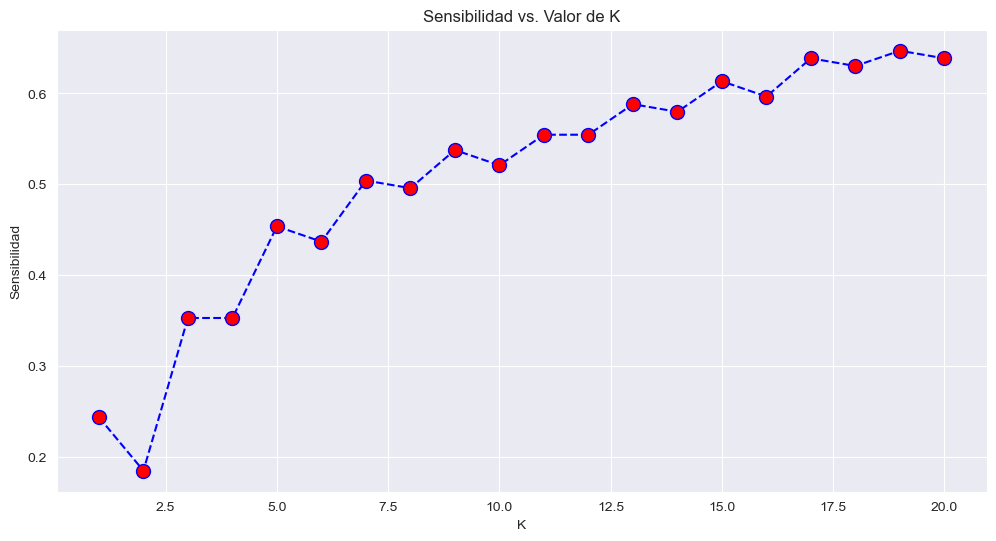

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(k_values_recall_smote, recall_scores_smote, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Sensibilidad vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Sensibilidad')
plt.show()

Estos resultados sugieren que, aunque ajustar los pesos de las clases puede ayudar, el clasificador KNN puede no ser el mejor modelo para este tipo de datos desequilibrados. Podría ser beneficioso explorar otros modelos o técnicas más avanzadas para abordar el desequilibrio de clases, como modelos basados en árboles de decisión, técnicas de ensamblaje o métodos de muestreo más sofisticados.

### Ejercicio 2

In [24]:
us_arrests_data = pd.read_csv('./USArrests.csv')

us_arrests_data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Tenemos las siguientes columnas:
* State: El nombre del estado.
* Murder: Arrestos por asesinato por cada 100,000 habitantes.
* Assault: Arrestos por asalto por cada 100,000 habitantes.
* UrbanPop: Porcentaje de la población que vive en áreas urbanas.
* Rape: Arrestos por violación por cada 100,000 habitantes.

### Pasos a seguir

* Escalar los datos: Dado que k-medias es sensible a la escala de las variables, escalaremos los datos para que cada característica contribuya equitativamente al resultado.
* Calcular la WCSS para varios valores de k: Esto nos ayudará a visualizar el "método del codo" y elegir un valor adecuado de k.
* Calcular el coeficiente de silueta para los mismos valores de k: Esto proporciona una perspectiva sobre la cohesión y la separación de los grupos formados.
* Elegir el valor de k y realizar la agrupación con k-medias.
Analizar los resultados y los perfiles de los conglomerados formados.

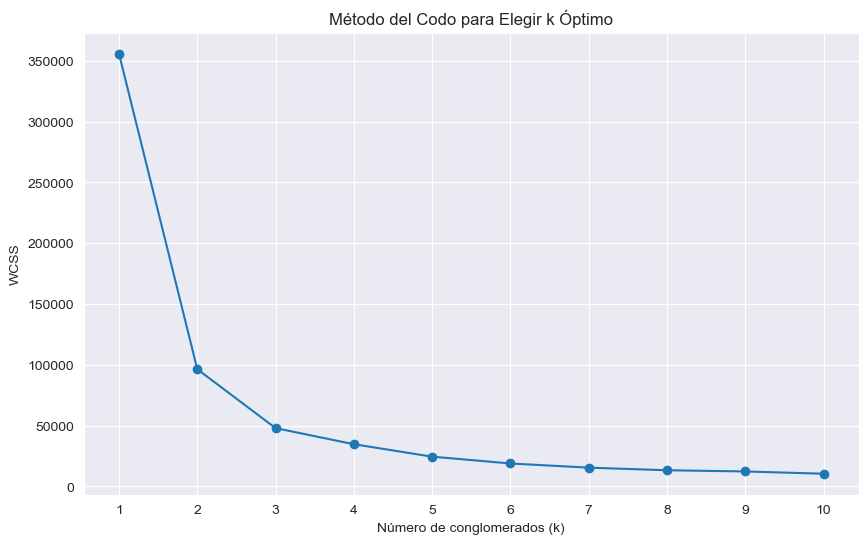

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Eliminando la columna 'State' para el análisis numérico
data_for_clustering = us_arrests_data.drop('State', axis=1)

# Escalando los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Calculando WCSS para diferentes valores de k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_for_clustering)
    wcss.append(kmeans.inertia_)

# Graficando el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo para Elegir k Óptimo')
plt.xlabel('Número de conglomerados (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Visualizamos nuestro método del codo, el cual nos indica que el valor óptimo de k está alrededor de 3 o 4.

Utilizaremos el coeficiente de silueta para determinar el valor óptimo de k. Sabiendo que nuestro valor óptimo de k está entre 3 y 4, calcularemos el coeficiente de silueta para los valores entre 1 y 6. Esto nos ayudará a determinar el número óptimo de conglomerados, no solo en términos de WCSS, sino también en términos de la cohesión y la separación de los grupos.

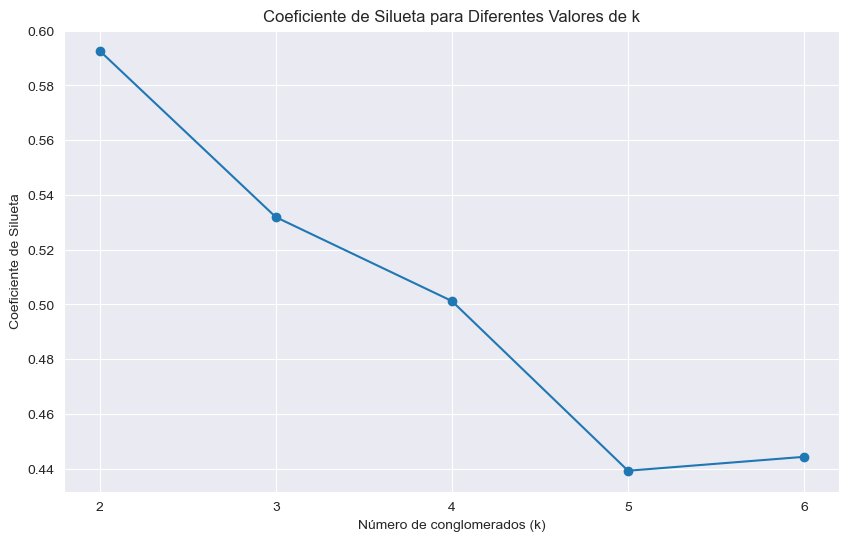

In [26]:
from sklearn.metrics import silhouette_score

# Calculando el coeficiente de silueta para cada k
silhouette_coefficients = []
for i in range(2, 7):  # El coeficiente de silueta no puede ser calculado para k=1
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_for_clustering)
    score = silhouette_score(data_for_clustering, kmeans.labels_)
    silhouette_coefficients.append(score)

# Graficando el coeficiente de silueta para cada k
plt.figure(figsize=(10, 6))
plt.plot(range(2, 7), silhouette_coefficients, marker='o')
plt.title('Coeficiente de Silueta para Diferentes Valores de k')
plt.xlabel('Número de conglomerados (k)')
plt.ylabel('Coeficiente de Silueta')
plt.xticks(range(2, 7))
plt.grid(True)
plt.show()

El valor más alto del coeficiente de silueta se obtiene para k=2, sin embargo, el valor de k=3 también es bastante alto. Por lo tanto, elegiremos k=3 como el valor óptimo de k.

Dado esto, observando ambos análisis, podemos concluir que el valor óptimo es k = 3.

In [27]:
# Realizando K-Means clustering con k=3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_for_clustering)

# Añadiendo la asignación de conglomerados al conjunto de datos original
us_arrests_data['Cluster'] = clusters

# Visualizando los primeros registros con la asignación de conglomerados
us_arrests_data.head()

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


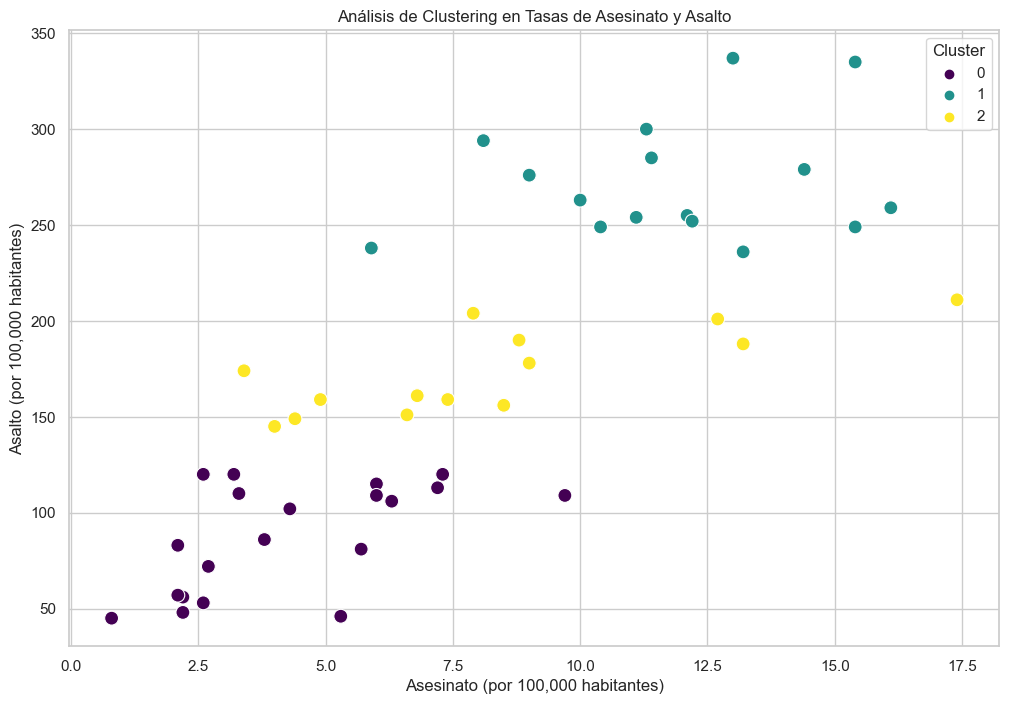

In [28]:
import seaborn as sns

# Configurando el estilo del gráfico
sns.set(style="whitegrid")

# Creando un gráfico de dispersión
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='Murder', y='Assault', hue='Cluster', data=us_arrests_data, palette='viridis', s=100)
plt.title('Análisis de Clustering en Tasas de Asesinato y Asalto')
plt.xlabel('Asesinato (por 100,000 habitantes)')
plt.ylabel('Asalto (por 100,000 habitantes)')
plt.legend(title='Cluster', loc='upper right')

# Mostrando el gráfico
plt.show()

Los estados se han agrupado en los siguientes conglomerados:

* Cluster 0: Arkansas, Colorado, Georgia, Massachusetts, Missouri, Nevada, New Jersey, New York, North Carolina, Ohio, Pennsylvania, Rhode Island, Tennessee, Texas, Virginia, Washington, Wyoming.

* Cluster 1: Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, Oklahoma, Oregon, South Dakota, Utah, Vermont, West Virginia, Wisconsin.

* Cluster 2: Alabama, Alaska, Arizona, California, Delaware, Florida, Illinois, Louisiana, Maryland, Michigan, Mississippi, New Mexico, South Carolina.

Interpretación:

* Cluster 0 podría ser denominado como "Moderadamente Urbanizado y Criminalizado". Este grupo incluye una mezcla de estados con niveles moderados de crimen y alta urbanización. Algunos de estos estados son conocidos por tener grandes ciudades (como Nueva York, Texas, y California), pero sus tasas de criminalidad no son las más altas.

* Cluster 1 podría llamarse "Bajo Crimen y Urbanización". Este grupo consiste principalmente en estados con bajos niveles de crimen y urbanización. Muchos de estos estados son más rurales o tienen poblaciones más pequeñas.

* Cluster 2 se podría describir como "Altamente Criminalizado". Este grupo contiene estados con las tasas más altas de crimen. Incluye estados con algunas de las ciudades más grandes y pobladas, como California y Florida, que son conocidas por tener tasas de crimen relativamente altas.